In [1]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt


In [2]:
# Importing the model
model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\NP11\\rhto.xml")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-21


In [3]:
# biomass_rxn = 'r_4041' # biomass_rxn
# model.objective = biomass_rxn 
# model.optimize()
# model.summary()


In [49]:
# Opening glucose uptake bound

medium = model.medium
medium["r_1714"] = 1000.0
model.medium = medium
medium

## model.reactions.r_1714
# All fluxes
model.objective = 'r_1714' # glc ex rxn
solution = model.optimize()
all_fluxes = solution.fluxes.to_frame(name='Flux')

'r_0001'

In [15]:
# Glc max at 0.05 GR and another round for 0.3 GR
growth_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.3]

all_fluxes_dif_GR = pd.DataFrame(columns=['Glucose uptake', *all_fluxes.index], index=range(len(growth_rate))) #flux_values.index gives the row names column, * extracts the list of strings

for i in range(len(growth_rate)):
    # medium = model.medium
    # medium["EX_glc__D_e"] = glucose_uptakes[i]
    # model.medium = medium
    # model.reactions.XPK.bounds = XPK_bounds[i], XPK_bounds[i]
    model.objective = 'r_1714'
    model.reactions.r_4041.bounds = growth_rate[i], growth_rate[i]
    solution = model.optimize()
    all_fluxes_dif_GR.loc[i] = solution.fluxes[['r_1714', *all_fluxes.index]].values
    
all_fluxes_dif_GR.insert(0, 'Biomass growth rate', growth_rate, True)

all_fluxes_dif_GR

# model.objective = 'r_1714' # glc ex rxn
# model.reactions.r_4041.bounds = growth_rate[0], growth_rate[0] # biomass rxn
# model.optimize()

,Biomass growth rate,Glucose uptake,r_0001,r_0002,r_0003,r_0004,r_0005,r_0006,r_0007,r_0012,...,y300064,y300065,y300066,y300068,y300069,y300070,y300072,y300074,y300075,y300078
0,0.05,-0.709629,0.0,0.0,0.0,0.0,0.053917,0.01801,0.002708,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.10,-1.314945,0.0,0.0,0.0,0.0,0.107835,0.036019,0.005417,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.15,-1.920261,0.0,0.0,0.0,0.0,0.161752,0.054029,0.008125,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.20,-2.525578,0.0,0.0,0.0,0.0,0.215669,0.072038,0.010833,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.25,-3.130894,0.0,0.0,0.0,0.0,0.269586,0.090048,0.013542,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.30,-3.73621,0.0,0.0,0.0,0.0,0.323504,0.108057,0.01625,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Exchange fluxes
exchange_fluxes_table = all_fluxes_dif_GR[['r_4041', 'r_1714', 'r_1992', 'r_1654','r_2060','r_2005', 'r_1672']]

for i in range(len(exchange_fluxes_table.columns)):
    exchange_fluxes_table = exchange_fluxes_table.rename(columns = {exchange_fluxes_table.columns[i]: getattr(model.reactions, exchange_fluxes_table.columns[i]).name})

exchange_fluxes_table

,biomass pseudoreaction,D-glucose exchange,oxygen exchange,ammonium exchange,sulphate exchange,phosphate exchange,carbon dioxide exchange
0,0.05,-0.709629,-2.030302,-0.205475,-0.00425,-0.010985,2.193804
1,0.1,-1.314945,-3.434728,-0.41095,-0.008501,-0.021969,3.761734
2,0.15,-1.920261,-4.839155,-0.616426,-0.012751,-0.032954,5.329663
3,0.2,-2.525578,-6.243581,-0.821901,-0.017002,-0.043939,6.897592
4,0.25,-3.130894,-7.648008,-1.027376,-0.021252,-0.054923,8.465522
5,0.3,-3.73621,-9.052435,-1.232851,-0.025503,-0.065908,10.033451


In [64]:
PPP_fluxes = all_fluxes_dif_GR[['r_4041', 'r_1714', 'r_0466', 'r_1049', 'r_1048','r_1050', 't_0081', 'r_0450','r_0959','r_0961']]
# Change G6PDH2rp column name to oxpp 

for i in range(len(PPP_fluxes.columns)):
    PPP_fluxes = PPP_fluxes.rename(columns = {PPP_fluxes.columns[i]: getattr(model.reactions, PPP_fluxes.columns[i]).name})

PPP_fluxes = PPP_fluxes.rename(columns = {'glucose 6-phosphate dehydrogenase': 'oxpp'})
PPP_fluxes

,biomass pseudoreaction,D-glucose exchange,oxpp,transketolase 1,transaldolase,transketolase 2,phosphoketolase,fructose-bisphosphate aldolase,pyruvate decarboxylase,pyruvate dehydrogenase
0,0.05,-0.709629,0.291854,0.069139,0.069139,0.060676,0.078852,0.385458,0.103483,0.619583
1,0.1,-1.314945,0.583709,0.138278,0.138278,0.121352,0.157705,0.666603,0.206966,1.030541
2,0.15,-1.920261,0.875563,0.207417,0.207417,0.182028,0.236557,0.947748,0.310449,1.441499
3,0.2,-2.525578,1.167417,0.276556,0.276556,0.242704,0.31541,1.228893,0.413932,1.852457
4,0.25,-3.130894,1.459272,0.345695,0.345695,0.30338,0.394262,1.510038,0.517415,2.263415
5,0.3,-3.73621,1.751126,0.414834,0.414834,0.364056,0.473114,1.791183,0.620898,2.674372


In [59]:
# ATPM and ACITL fluxs
ATPM_ACITL_fluxes = all_fluxes_dif_GR[['r_4041', 'r_1714', 'y200003']] #Didnt find the ID for ATP maintainance rxn, ACS - Acetyl-CoA synthetase
for i in range(len(ATPM_ACITL_fluxes.columns)):
    ATPM_ACITL_fluxes = ATPM_ACITL_fluxes.rename(columns = {ATPM_ACITL_fluxes.columns[i]: getattr(model.reactions, ATPM_ACITL_fluxes.columns[i]).name})

ATPM_ACITL_fluxes

,biomass pseudoreaction,D-glucose exchange,ATP-citrate lyase
0,0.05,-0.709629,0.0
1,0.1,-1.314945,0.0
2,0.15,-1.920261,0.0
3,0.2,-2.525578,0.0
4,0.25,-3.130894,0.0
5,0.3,-3.73621,0.0


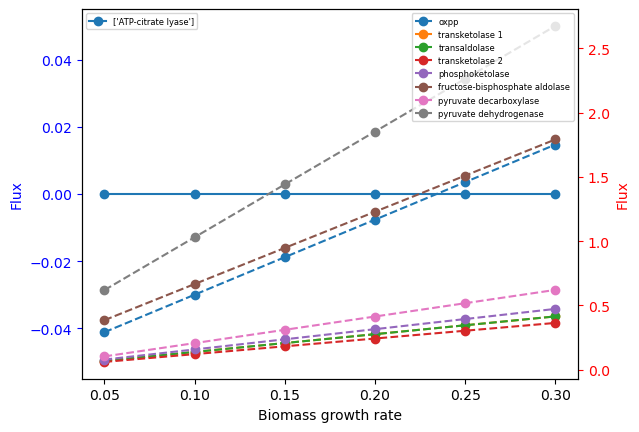

In [66]:
# Plot the PPP enzymes fluxes with ATPM and ACITL on seperate y-axis

# Sample data
x = growth_rate
y1 = np.abs(ATPM_ACITL_fluxes[['ATP-citrate lyase']])
y2 = np.abs(PPP_fluxes[['oxpp', 'transketolase 1', 'transaldolase', 'transketolase 2',	'phosphoketolase',	'fructose-bisphosphate aldolase',	'pyruvate decarboxylase',	'pyruvate dehydrogenase']])

fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'o-', label=['ATP-citrate lyase'])
ax1.set_xlabel('Biomass growth rate')
ax1.set_ylabel('Flux', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(fontsize=6, loc='upper left')

# Create the second y-axis on the right
ax2 = ax1.twinx()

# Plot the second set of data on the right y-axis 
ax2.plot(x, y2, 'o--', label=['oxpp', 'transketolase 1', 'transaldolase', 'transketolase 2',	'phosphoketolase',	'fructose-bisphosphate aldolase',	'pyruvate decarboxylase',	'pyruvate dehydrogenase'])
ax2.set_ylabel('Flux', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(fontsize=6, loc='upper right')

# Show the plot
plt.show()